In [1]:
#for numpy
import numpy as np

In [2]:
#for plotting purpose
import matplotlib.pyplot as plt

In [3]:
#for loading .mat files
import scipy.io as sci

In [4]:
#founction to compute squared-error cost function
def compute_cost(x,theta,y,r,lambo=0):
    hey=np.dot(x,np.transpose(theta))
    heyu=np.sum(((hey-y)*r)**2)/2
    heyu=heyu+(lambo/2)*((np.sum(theta**2))+(np.sum(x**2)))
    return heyu

In [5]:
#function to compute gradient
def compute_grad(x,theta,y,r,lambo=0):
    h=((x.dot(np.transpose(theta)))-y)*r
    theta_grad=(np.transpose(h)).dot(x)
    theta_grad=theta_grad+lambo*(theta)
    x_grad=h.dot(theta)
    x_grad=x_grad+lambo*(x)
    return theta_grad,x_grad
    

In [6]:
#location of file ex8_movies.mat
datafileloc="C:/Users/Ritik/Desktop/Projects_Flash/Done using Python_Andrew_Ng_Coursera/Week 9/machine-learning-ex8/ex8/ex8_movies.mat"

In [7]:
#loading ex8_movies.mat file into the program
data1=sci.loadmat(datafileloc)

In [8]:
#finding keys present in dictionary object
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])

In [9]:
#extracting y and r
y=np.array(data1['Y'])
r=np.array(data1['R'])

In [10]:
#knowing about dimensions of y and r
print(y.shape)
print(r.shape)

(1682, 943)
(1682, 943)


Text(0.5,0,'Users')

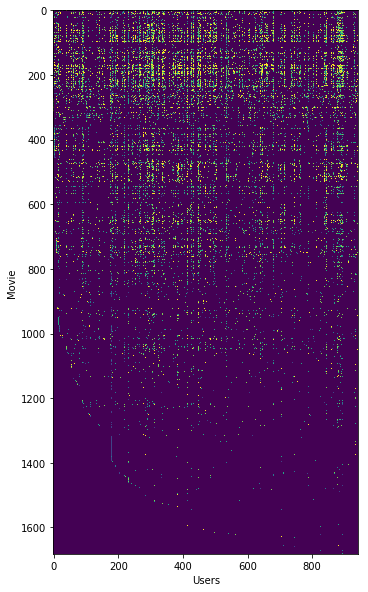

In [11]:
#y can be plotted as an image
plt.figure(figsize=(10,10))
plt.imshow(y)
plt.ylabel("Movie")
plt.xlabel("Users")

In [12]:
#location of aleready trained weights file
datafileloc2="C:/Users/Ritik/Desktop/Projects_Flash/Done using Python_Andrew_Ng_Coursera/Week 9/machine-learning-ex8/ex8/ex8_movieParams.mat"

In [13]:
#loading already trained weights
data2=sci.loadmat(datafileloc2)

In [14]:
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Theta', 'num_users', 'num_movies', 'num_features'])

In [15]:
#extracting information from data2
x=np.array(data2["X"])
theta=np.array(data2["Theta"])
num_users=(data2["num_users"])
num_movies=(data2["num_movies"])
num_features=(data2["num_features"])

In [16]:
#knowiing about dimensions of above extracted items
print(x.shape)
print(theta.shape)
print(num_users)
print(num_movies)
print(num_features)

(1682, 10)
(943, 10)
[[943]]
[[1682]]
[[10]]


In [17]:
#reducing data set to num_features=3 , num_movies=5 , num_users=4 }-> This is directed in problem statement just for checking
#correctness of cost function
J_val=compute_cost(x[:5,:3],theta[:4,:3],y[:5,:4],r[:5,:4])
print(J_val)

22.224603725685675


In [18]:
#checking cost function with regularization
J_val=compute_cost(x[:5,:3],theta[:4,:3],y[:5,:4],r[:5,:4],1.5)
print(J_val)

31.34405624427422


In [19]:
#now in the next part of probelm we can learn by randomly initializing x and theta and running \
#gradient descent over and over to make meaningful parameters
x=np.random.rand(1682,10)
theta=np.random.rand(943,10)
#now we assume we have been given 'y' and 'r'......and we will use previous 'y' and 'r' matrices only

In [20]:
iterations=4000
alpha=0.001
ite=[i for i in range(0,iterations+1)]

In [21]:
J_val=[compute_cost(x,theta,y,r)]


In [22]:
#running gradient descent
for i in range(0,iterations):
    theta_grad,x_grad=compute_grad(x,theta,y,r)
    theta=theta-alpha*(theta_grad)
    x=x-alpha*(x_grad)
    J_val.append(compute_cost(x,theta,y,r))

Text(0,0.5,'In sample Error')

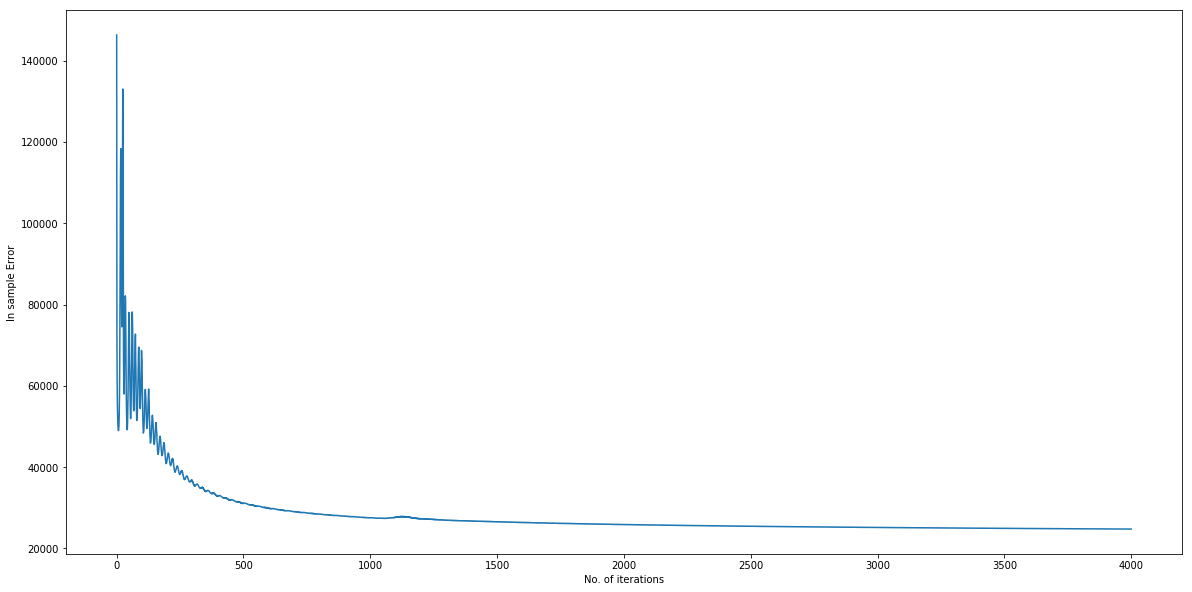

In [23]:
#plotting decrease of in sample error with run of gradient descent
plt.figure(figsize=(20,10))
plt.plot(ite,np.array(J_val))
plt.xlabel("No. of iterations")
plt.ylabel("In sample Error")

In [24]:
#now we can run more iterations to even further reduce error and also try different values of regularization parameter
#and if we had validation set we could have figured out the best value of regularizarion parameter

In [25]:
#then to predict rating for a movie 'A' by user 'B'
#we can multiply row A in 'x' matrix with row 'B' in 'theta' matrix